<a href="https://colab.research.google.com/github/pererodin/RPS-Theory/blob/main/RPS_Integration_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🧩 Индекс интеграции психики (Integration Index, до терапии) = -0.136
🧩 Индекс интеграции психики (после терапии) = -0.136


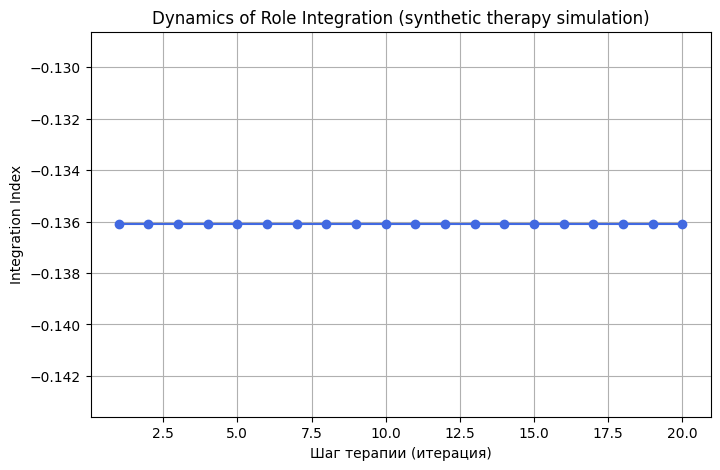

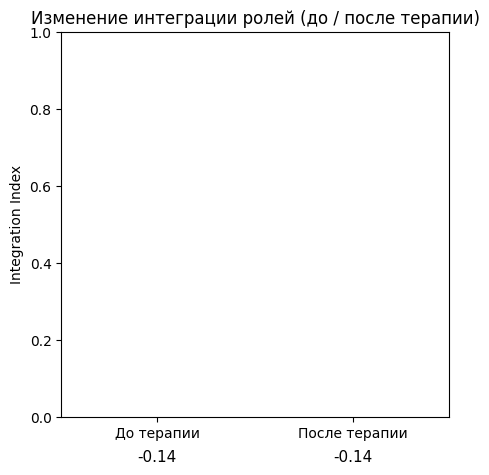

In [2]:
# 🧩 Synthetic modeling of role integration and cognitive coherence (RPS-Theory)
# Author: Stanislav Pererodin

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# --- 1. Определяем когнитивно-эмоциональные профили ролей ---
roles = {
    "Сын":        [0.9, 0.2, 0.3, 0.8],
    "Родитель":   [0.4, 0.9, 0.5, 0.6],
    "Партнёр":    [0.7, 0.6, 0.4, 0.9],
    "Специалист": [0.2, 0.8, 0.6, 0.3],
    "Ученик":     [0.6, 0.5, 0.7, 0.5],
    "Брат":       [0.7, 0.4, 0.5, 0.8],
    "Друг":       [0.8, 0.3, 0.4, 0.9],
}

cols = ["эмоция", "контроль", "риск", "социальность"]
role_df = pd.DataFrame(roles, index=cols).T

# --- 2. Масштабируем данные ---
scaler = StandardScaler()
scaled = scaler.fit_transform(role_df)
role_scaled = pd.DataFrame(scaled, index=role_df.index, columns=cols)

# --- 3. Матрица когнитивного сходства между ролями ---
cos_matrix = cosine_similarity(role_scaled)
cos_df = pd.DataFrame(cos_matrix, index=role_df.index, columns=role_df.index)

# --- 4. Индекс интеграции психики ---
integration_index = cos_df.where(np.triu(np.ones(cos_df.shape), k=1).astype(bool)).stack().mean()
print(f"\n🧩 Индекс интеграции психики (Integration Index, до терапии) = {integration_index:.3f}")

# --- 5. Моделирование терапии: постепенное сближение ролей ---
steps = 20
integration_values = []
current_roles = role_scaled.copy()

for step in range(steps):
    mean_profile = current_roles.mean(axis=0)
    current_roles = current_roles + 0.02 * (mean_profile - current_roles)
    new_cos = cosine_similarity(current_roles)
    new_mean = pd.DataFrame(new_cos).where(
        np.triu(np.ones_like(new_cos), k=1).astype(bool)
    ).stack().mean()
    integration_values.append(new_mean)

# --- 6. Итог после «терапии» ---
final_integration = integration_values[-1]
print(f"🧩 Индекс интеграции психики (после терапии) = {final_integration:.3f}")

# --- 7. График динамики интеграции ---
plt.figure(figsize=(8,5))
plt.plot(range(1, steps+1), integration_values, marker='o', color='royalblue')
plt.title("Dynamics of Role Integration (synthetic therapy simulation)")
plt.xlabel("Шаг терапии (итерация)")
plt.ylabel("Integration Index")
plt.grid(True)
plt.show()

# --- 8. Сравнение «до» и «после» ---
plt.figure(figsize=(5,5))
plt.bar(["До терапии", "После терапии"],
        [integration_index, final_integration],
        color=["darkred", "seagreen"])
plt.title("Изменение интеграции ролей (до / после терапии)")
plt.ylabel("Integration Index")
for i, val in enumerate([integration_index, final_integration]):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=11)
plt.ylim(0, 1)
plt.show()



🧩 Индекс интеграции психики (до терапии) = -0.136
🧩 Индекс интеграции психики (после терапии) = -0.143


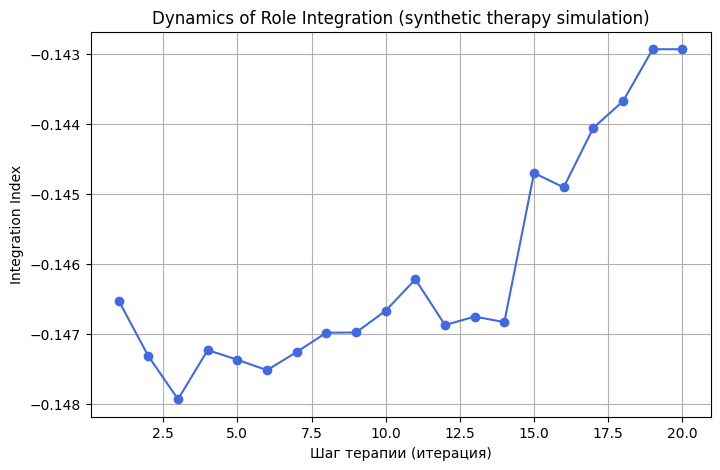

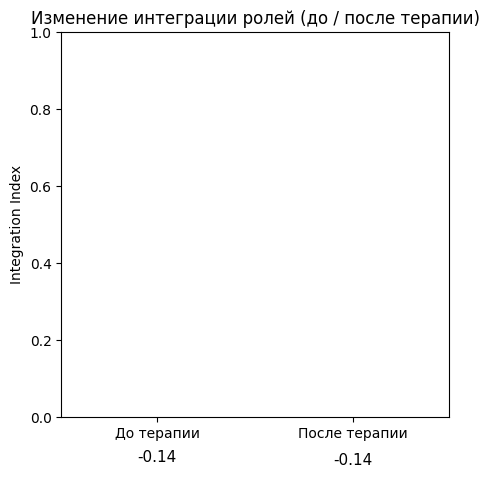

In [3]:
# --- 5. Моделирование терапии: постепенное сближение ролей ---
steps = 20
integration_values = []

# добавляем небольшой разброс восприятия (индивидуальные искажения)
np.random.seed(42)
current_roles = role_scaled + np.random.normal(0, 0.15, role_scaled.shape)

for step in range(steps):
    mean_profile = current_roles.mean(axis=0)

    # имитация терапевтического выравнивания — роли сближаются неравномерно
    delta = 0.03 * (mean_profile - current_roles) + np.random.normal(0, 0.01, current_roles.shape)
    current_roles += delta

    # пересчёт интеграции
    new_cos = cosine_similarity(current_roles)
    new_mean = pd.DataFrame(new_cos).where(
        np.triu(np.ones_like(new_cos), k=1).astype(bool)
    ).stack().mean()
    integration_values.append(new_mean)

# --- 6. Итог после «терапии» ---
final_integration = integration_values[-1]
print(f"\n🧩 Индекс интеграции психики (до терапии) = {integration_index:.3f}")
print(f"🧩 Индекс интеграции психики (после терапии) = {final_integration:.3f}")

# --- 7. График динамики интеграции ---
plt.figure(figsize=(8,5))
plt.plot(range(1, steps+1), integration_values, marker='o', color='royalblue')
plt.title("Dynamics of Role Integration (synthetic therapy simulation)")
plt.xlabel("Шаг терапии (итерация)")
plt.ylabel("Integration Index")
plt.grid(True)
plt.show()

# --- 8. Сравнение до / после ---
plt.figure(figsize=(5,5))
plt.bar(["До терапии", "После терапии"],
        [integration_index, final_integration],
        color=["darkred", "seagreen"])
plt.title("Изменение интеграции ролей (до / после терапии)")
plt.ylabel("Integration Index")
for i, val in enumerate([integration_index, final_integration]):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=11)
plt.ylim(0, 1)
plt.show()
